In [11]:
import numpy as np
import pandas as pd
#from io import StringIO
import os
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
h = 8
w = h*1.61803398875
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 26}

plt.rc('font', **font)

from matplotlib import rc
plt.rc('font',**{'family':'serif','serif':['Times New Roman']})
plt.rc('text', usetex=True)

h = 8
w = 8*1.61803398875

In [12]:
# Data the KB Curve is Based Upon
working_dir = os.path.join(os.path.expanduser("~"), "Documents/github/comprehensive/")
data_path = "2_data/overpressure/op_from_KB.csv"
filePath = os.path.join(working_dir, data_path)
shot_data = pd.read_csv(filePath)
shot_data.head()
#shot_data.plot(x = 'scaled_distance', y = 'overpressure', kind='scatter')

,scaled_distance,overpressure,reference
0,0.164557,6820.682809,"(Kingery, 1966)"
1,0.206796,5488.952778,"(Kingery, 1966)"
2,0.249318,4531.087903,"(Kingery, 1966)"
3,0.291369,3837.075295,"(Kingery, 1966)"
4,0.333523,3290.969303,"(Kingery, 1966)"


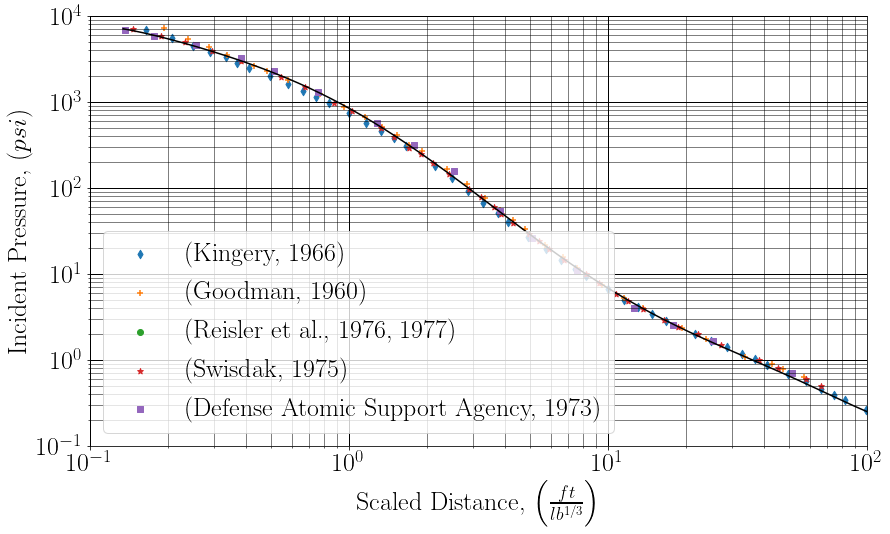

In [17]:
Blast = 'surface'

if Blast == 'freeair':
    T = np.arange(0.134,100.0,0.001)
    TL = np.log10(T)
    U = (-0.80501734056 + 1.37407043777*TL)   
    Y = 10**(- 0.0423733936826 + 1.36456871214000*U
        - 0.0570035692784*U**2 - 0.18283222479600*U**3
        + 0.0118851436014*U**4 + 0.04326486876270*U**5  
        - 0.0007997367834*U**6 - 0.00436073555033*U**7)

else: #surface
    T1 = np.arange(0.134,150,0.001)
    TL1 = np.log10(T1)
    U1 = (-0.756579301809 + 1.35034249993*TL1)   
    Y1 = 10**(+ 1.77284970457000*U1**0 - 1.69012801396000*U1**1
              + 0.00804973591951*U1**2 + 0.33674311494100*U1**3
              - 0.00516226351334*U1**4 - 0.08092286198880*U1**5
              - 0.00478507266747*U1**6 + 0.00793030472242*U1**7
              + 0.00076844697350*U1**8)

pltfont = {'fontname':'serif', 'fontsize':'16'}
fig, ax = plt.subplots(figsize=(w, h))

mkr_dict = {'(Kingery, 1966)': 'd',
            '(Goodman, 1960)': '+',
            '(Reisler et al., 1976, 1977)': 'o', 
            '(Swisdak, 1975)': '*',
            '(Defense Atomic Support Agency, 1973)': 's'}
for kind in mkr_dict:
    d = shot_data[shot_data.reference==kind]
    ax.scatter(d.scaled_distance, d.overpressure,  
                marker = mkr_dict[kind], label=kind)
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(loc=3)
x = 1
y = 1
plt.grid(b=True, which='major', color='black', linestyle='-', linewidth=1)
plt.grid(b=True, which='minor', color='black', linestyle='-', linewidth=.5)
plt.ylim(0.1,10000)
plt.xlim(0.100,100)
plt.loglog(T1*x,Y1*y,color='black');
plt.ylabel(r'Incident Pressure, $\left(psi\right)$')
plt.xlabel(r'Scaled Distance, $\left(\frac{ft}{lb^{1/3}}\right)$')

#ax.annotate('local max', xy=(3.2, 1.7), xytext=(4.1, 4.1),
#            arrowprops=dict(facecolor='black', shrink=0.05),
#            )
plt.tight_layout()
data_path = "5_reports/figures"
file_name = "fig_op_data.png"
filePath = os.path.join(working_dir, data_path, file_name)
plt.savefig(filePath)

plt.show()